In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KRR import KRR_covariate_shift


In [2]:
fcn = 'C' # true function
sigma = 1 # standard deviation of noise
beta = 2 # ratio parameter in the grid of lambdas
seed = 10000 # random seed


n = 500 # number of source samples
n_0 = n # number of unlabeled target samples
B = 5 # parameter of distribution shift


# run experiment
test = KRR_covariate_shift(n, n_0, B, sigma, fcn, seed)
test.fit(beta = beta)




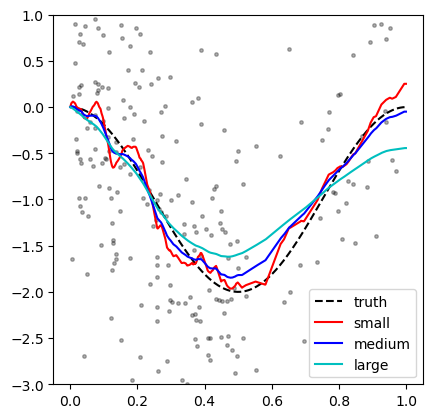

Source and target excess risks: estimated by Monte Carlo method, report means and standard errors
Source: 
Small: 0.02146419842542801 (0.0002437092418712069)
Medium: 0.012832465845634107 (0.00015284860909236929)
Large: 0.04617419389539289 (0.0005914193829838631)
Best penalty for source: medium

Target: 
Small: 0.016849156733165713 (0.00019822477082599748)
Medium: 0.023704080691654545 (0.00024628255086611597)
Large: 0.10029609107172162 (0.0007488029733651398)
Best penalty for target: small


In [3]:
# Visualization and evaluation of candidates
# True function: black dashed line
# Source data: gray dots
# KRR with small penalty: red
# KRR with medium penalty: blue
# KRR with large penalty: cyan


# small, medium, and large penalty parameters
list_idx_candidates = [2, 4, 6]


#####################
# visualize candidates
X_new = np.arange(0, 1, 0.001) # grid
test.predict_candidates(X_new, list_idx_candidates)

fig, ax = plt.subplots()
xlim = [-0.05, 1.05]
ylim = [-3, 1]

plt.ylim(ylim)
plt.xlim(xlim)
plt.plot(test.X_1, test.y_1, 'k.', alpha = 0.3, markersize = 5, label = '_nolegend_')
plt.plot(X_new, test.y_new_true, 'k--', label = 'truth')

plt.plot(X_new, test.y_new_candidates[0], 'r-', label = 'small')
plt.plot(X_new, test.y_new_candidates[1], 'b-', label = 'medium')
plt.plot(X_new, test.y_new_candidates[2], 'c-', label = 'large')
plt.legend(loc = 'lower right')
ax.set_aspect( (xlim[1] - xlim[0]) / (ylim[1] - ylim[0]) )    
plt.show()

fig.savefig('candidates.pdf', format = 'pdf', transparent = True)


#####################
# evaluate candidates
print('Source and target excess risks: estimated by Monte Carlo method, report means and standard errors')

# source distribution
N_test = 10000 # number of new testing samples for evaluation
test.evaluate_candidates(distribution = 'source', list_idx_candidates = list_idx_candidates, N_test = N_test, seed = seed)
print('Source: ')
print('Small: {} ({})'.format(test.err_candidates[0], test.err_candidates_ste[0]))
print('Medium: {} ({})'.format(test.err_candidates[1], test.err_candidates_ste[1]))
print('Large: {} ({})'.format(test.err_candidates[2], test.err_candidates_ste[2]))
print('Best penalty for source: medium')
print('')

# target distribution
test.evaluate_candidates(distribution = 'target', list_idx_candidates = list_idx_candidates, N_test = N_test, seed = seed)
print('Target: ')
print('Small: {} ({})'.format(test.err_candidates[0], test.err_candidates_ste[0]))
print('Medium: {} ({})'.format(test.err_candidates[1], test.err_candidates_ste[1]))
print('Large: {} ({})'.format(test.err_candidates[2], test.err_candidates_ste[2]))
print('Best penalty for target: small')


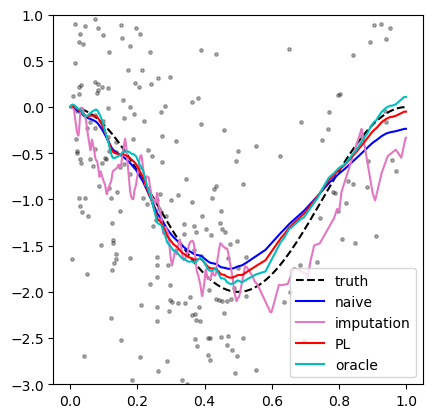

Target excess risks: estimated by Monte Carlo method, report means and standard errors
Naive: 0.04882804648207494 (0.0003957594651360859)
Pseudo-Labeling: 0.023704080691654545 (0.00024628255086611597)
Oracle: 0.01528817599735602 (0.00016971414216182719)

Selected lambdas: 
Naive: 0.0064
Pseudo-Labeling: 0.0032
Oracle: 0.0016


In [4]:
# Visualization and evaluation of selected models
# True function: black dashed line
# Source data: gray dots
# Naive method (hold-out validation using source data): blue
# Imputation model (undersmoothed): pink
# New method (hold-out validation with pseudo-labels): red
# Oracle method (validation with noiseless true labels): cyan


#####################
# visualization
X_new = np.arange(0, 1, 0.001) # grid
test.predict_final(X_new)

fig, ax = plt.subplots()
xlim = [-0.05, 1.05]
ylim = [-3, 1]

plt.ylim(ylim)
plt.xlim(xlim)
plt.plot(test.X_1, test.y_1, 'k.', alpha = 0.3, markersize = 5, label = '_nolegend_')
plt.plot(X_new, test.y_new_true, 'k--', label = 'truth')
plt.plot(X_new, test.y_new_naive, 'b-', label = 'naive')
plt.plot(X_new, test.y_new_tilde, color = 'tab:pink', label = 'imputation')
plt.plot(X_new, test.y_new_pseudo, 'r-', label = 'PL')
plt.plot(X_new, test.y_new_real, 'c-', label = 'oracle')

plt.legend(loc = 'lower right')
ax.set_aspect( (xlim[1] - xlim[0]) / (ylim[1] - ylim[0]) )    
plt.show()

fig.savefig('demo.pdf', format = 'pdf', transparent=True)


#####################
# evaluation
N_test = 10000
test.evaluate_final(N_test = N_test, seed = seed)
print('Target excess risks: estimated by Monte Carlo method, report means and standard errors')
print('Naive: {} ({})'.format(test.err_naive, test.err_naive_ste))
print('Pseudo-Labeling: {} ({})'.format(test.err_pseudo, test.err_pseudo_ste))
print('Oracle: {} ({})'.format(test.err_real, test.err_real_ste))


# report selected lambdas
lbds = [test.lbd_naive, test.lbd_pseudo, test.lbd_real]
print('')
print('Selected lambdas: ')
print('Naive: {}'.format(lbds[0]))
print('Pseudo-Labeling: {}'.format(lbds[1]))
print('Oracle: {}'.format(lbds[2]))
